<a href="https://colab.research.google.com/github/YoonyoungChoi/problem_set/blob/main/STA503_Problem_Set4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [106]:
!pip install arch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import arch
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
import io

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
##Q1
#정규분포 난수 생성
error = np.random.randn(1000)

#초깃값은 0으로 설정
#y_1=0.5+0.5*error_1
#y_2=0.5+0.5*error_1+0.3*error_2

#y_3부터 반복문 수행
y= [0.5+0.5*error[0], 0.5+0.5*error[1]+0.3*error[0]]
for i in range(len(error)-2):
  y.append(0.5*error[i+2]+error[i+1]+error[i])

In [4]:
#y_t에 대해 탐구
y_mean=np.mean(y)
print(y_mean)

#표본표준편차
def sample_std(x):
  return np.sqrt((np.sum((x-np.mean(x))**2))/(len(x)-1))
print(sample_std(y))

-0.00023227144639978193
1.512115097891127


In [5]:
#자기공분산, 자기상관계수 함수 정의
def autocovariance(y, N, order, y_mean):
  autocov = 0
  for i in np.arange(0, N-order):
    autocov += ((y[i+order])-y_mean)*(y[i]-y_mean)
  return (1/(N-1))*autocov

def autocorrelation(y, N, order, y_mean):
  return autocovariance(y, N, order, y_mean)/autocovariance(y, N, 0, y_mean)

In [6]:
#초기값 설정
autocov_result=[]
autocor_result=[]

for i in range(100):
  autocov_result.append(autocovariance(y, len(y), i, y_mean))
  autocor_result.append(autocorrelation(y, len(y), i, y_mean))

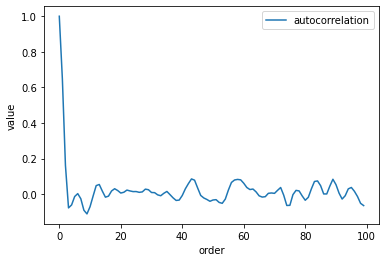

In [8]:
#가설검정: sequence y_t는 이동평균(MA) 시계열이 아닌 White Noise 다 vs. 귀무가설이 참이 아니다
#H_0 하에서는 모든 theta = 0 > 자기상관계수_k는 order k에 상관 없이 평균 0, 분산 1/N인 정규분포를 따름
#표준오차 (Standard Error): 1/np.sqrt(N)

plt.plot(range(100), autocor_result, label = 'autocorrelation')
plt.xlabel('order')
plt.ylabel('value')
plt.legend()

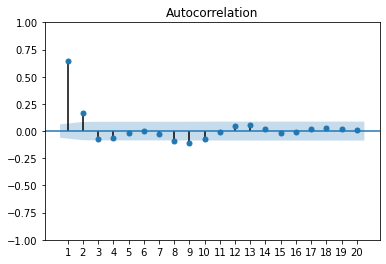

In [10]:
sgt.plot_acf(y, lags=20, zero=False)
plt.xticks(range(1,21))
plt.show()

In [123]:
from google.colab import files
uploaded = files.upload()
import io
abday = pd.read_csv(io.StringIO(uploaded['abday.csv'].decode('utf-8')),sep = '\,', header = None, encoding = 'utf-8-sig')


Saving abday.csv to abday (10).csv


/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [125]:
display(abday)
abday.columns = ['day', 'return']

,day,return
0,19900102,0.000000
1,19900103,-0.002589
2,19900104,-0.008650
3,19900105,-0.009804
4,19900108,0.004504
...,...,...
2523,19991227,-0.000851
2524,19991228,0.000384
2525,19991229,0.003971
2526,19991230,0.000690
